## 1. Create sine wave

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 ## 2. lambda expression (Anonymous function)
 In Matlab: y=@(x,noise)=sin(x)+noise

In [2]:
y = lambda x, noise: np.sin(x) + noise

## 3. generating the sine noisy wave
Here we face our first problem with the dimensions of x. x is created with

    x=np.linspace(-2*np.pi,2*np.pi,N)

Its x.shape = (100,), which means it's a 100 elements array. 
The noise added to the sine wave evaluated is created with:

    noise = 0.1*np.random.randn(N,1)

and its dimensions are (100,1), which is a column vector of 100 rows. You'd think that (100,) and (100,1) would play nicely in the evaluation of the lambda function, but they don't: the resulting y_eval is (100,100)!

In [3]:
N = 100
x=np.linspace(-2*np.pi,2*np.pi,N)
print(x.shape)
noise = 0.1*np.random.randn(N,1)
print(noise.shape)
y_eval = y(x,noise)
y_eval.shape

(100,)
(100, 1)


(100, 100)

## 4. Fixing the noisy sine wave 1
this method fixes the dimension problem, by creating noise as a simple numpy array Further down, we explore other methods - one that looks as if it should fix the problem, but it doesn't.

(100,)


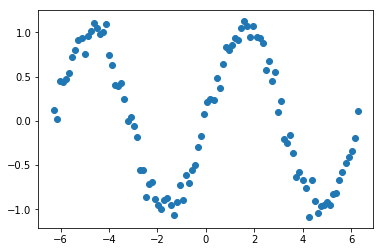

In [16]:
noise = 0.1*np.random.randn(N,)
y_eval = y(x,noise)
print(y_eval.shape)
plt.scatter(x, y_eval)

## 4. Fixing the noisy sine wave 2
This method doesn't work. 
Despite using the reshape funcion on x:

    x.reshape((N,1))

in an attempt to force a 1 column to become part of the dimensions of x, the x.shape is still (100,) and the evaluation of the lambda function y returns (100,100) - which doesn't make sense, since noise is (100,1) & the sin wave (100,)

In [5]:
noise = 0.1*np.random.randn(N,1)
x.reshape((N,1))
print(x.shape)
y_eval = y(x,noise)
y_eval.shape

(100,)


(100, 100)

## 4. Fixing the noisy sine wave 3
This fixes the x.shape problem by adding a new dimension to x. After this line

    x1 = np.expand_dims(x,axis=1)

x is a column vector (before it was a simple numpy array), and the evaluation of the lambda function works perfectly.

In [15]:
x1 = np.expand_dims(x,axis=1)
noise = 0.1*np.random.randn(N,1)
print(x1.shape)
print(noise.shape)
y_eval = y(x1,noise)
y_eval.shape

(100, 1)
(100, 1)


(100, 1)

## 5. Plotting
Just an example of syntax for plotting with legends

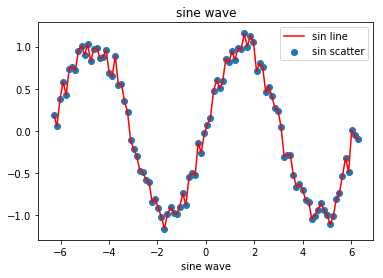

In [7]:
plt.scatter(x, y_eval)
plt.legend(['sine wave'])
plt.plot(x,y_eval, color='r')
plt.xlabel('sine wave')
plt.title('sine wave')
plt.legend(["sin line", "sin scatter"])